In [ ]:
# import libraries

import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from scipy.spatial.distance import cosine
from google.colab import drive
drive.mount('/content/drive')
import nltk
from nltk.corpus import gutenberg

!pip install gensim
!pip uninstall numpy gensim -y
!pip install numpy gensim --no-cache-dir
!pip install --upgrade pip setuptools wheel
!pip install -U gensim numpy scipy

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 256.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 287.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)


Task 1

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
# df = pd.read_csv('IMDB Dataset.csv')

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['cleaned_review'] = df['review'].apply(preprocess_text)
# df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})

In [ ]:
print(df['sentiment'].unique())

[1 0]


In [ ]:
print(df.head())

                                              review  sentiment  \
0  One of the other reviewers has mentioned that ...          1   
1  A wonderful little production. <br /><br />The...          1   
2  I thought this was a wonderful way to spend ti...          1   
3  Basically there's a family where a little boy ...          0   
4  Petter Mattei's "Love in the Time of Money" is...          1   

                                      cleaned_review  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production br br the filmin...  
2  i thought this was a wonderful way to spend ti...  
3  basically theres a family where a little boy j...  
4  petter matteis love in the time of money is a ...  


In [ ]:
X = df['cleaned_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
vectorizer = TfidfVectorizer(lowercase=False, token_pattern=r'(?u)\b\w+\b')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test_tfidf)

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.7671


Task 2

In [ ]:
import numpy as np

embeddings = {}
expected_dim = 200

with open('glove.6B.200d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')

        if len(vector) != expected_dim:
            continue
        embeddings[word] = vector

print(f"Loaded {len(embeddings)} valid word vectors.")

Loaded 84057 valid word vectors.


In [ ]:
words_to_check = ['female', 'queen', 'male']
for word in words_to_check:
    vec = embeddings.get(word.lower())
    if vec is None:
        print(f"{word} not in embeddings!")
    else:
        print(f"{word} vector shape: {vec.shape}")

female vector shape: (200,)
queen vector shape: (200,)
male vector shape: (200,)


In [ ]:
def word_analogy(word_a, word_b, word_c, embeddings):
    vec_a = embeddings.get(word_a.lower())
    vec_b = embeddings.get(word_b.lower())
    vec_c = embeddings.get(word_c.lower())

    if vec_a is None or vec_b is None or vec_c is None:
        print("One or more words not in vocabulary!")
        return None

    if vec_a.shape != (200,) or vec_b.shape != (200,) or vec_c.shape != (200,):
        print("Dimension mismatch! Check embeddings.")
        return None

    target_vector = vec_b - vec_a + vec_c
    similarities = {}
    for word, vec in embeddings.items():
        if word in [word_a, word_b, word_c]:
            continue
        similarities[word] = cosine_similarity(target_vector, vec)

    return sorted(similarities.items(), key=lambda x: x[1], reverse=True)[:10]

In [ ]:
def cosine_similarity(vec_a, vec_b):
    return 1 - cosine(vec_a, vec_b)

In [ ]:
results = word_analogy('female', 'queen', 'male', embeddings)
print("Top 10 results for 'Queen – Female + Male':")
for word, score in results:
    print(f"{word}: {score:.4f}")

Top 10 results for 'Queen – Female + Male':
king: 0.6505
elizabeth: 0.6339
monarch: 0.6265
princess: 0.6051
royal: 0.6025
throne: 0.5850
coronation: 0.5581
crown: 0.5549
victoria: 0.5400
prince: 0.5270


Task 3

In [ ]:
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
corpus = []
for fileid in gutenberg.fileids():
    raw_text = gutenberg.raw(fileid)
    corpus.append(raw_text)

full_text = ' '.join(corpus)

def preprocess(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = []
    for word in tokens:
        if word.isalpha():
            filtered_tokens.append(word.lower())
    tokens = filtered_tokens
    return tokens

processed_text = preprocess(full_text)

In [ ]:
sentences = []
for i in range(0, len(processed_text), 10):
    sentence = processed_text[i : i + 10]
    sentences.append(sentence)

model = Word2Vec(
    sentences=[processed_text],
    vector_size=100,
    window=5,
    min_count=1,
    workers=4
)

In [ ]:
print("Similarity between 'woman' and 'man':", model.wv.similarity('woman', 'man'))
print("Most similar to 'king':", model.wv.most_similar('king', topn=5))

Similarity between 'woman' and 'man': 0.994556
Most similar to 'king': [('fixing', 0.43644025921821594), ('trump', 0.3877032697200775), ('indignity', 0.3861441910266876), ('moo', 0.3854275643825531), ('mafeking', 0.37144356966018677)]


In [ ]:
def analogy(a, b, c, model):
    result = model.wv.most_similar(positive=[b, c], negative=[a], topn=1)
    return result[0][0]

print("Queen - Female + Male →", analogy('female', 'queen', 'male', model))

Queen - Female + Male → phoenicians


In [ ]:
word_freq = {}
for word in model.wv.index_to_key:
    count = model.wv.get_vecattr(word, "count")
    word_freq[word] = count

top_words = sorted(word_freq, key=word_freq.get, reverse=True)[:100]
top_vectors = []
for word in top_words:
    vector = model.wv[word]
    top_vectors.append(vector)

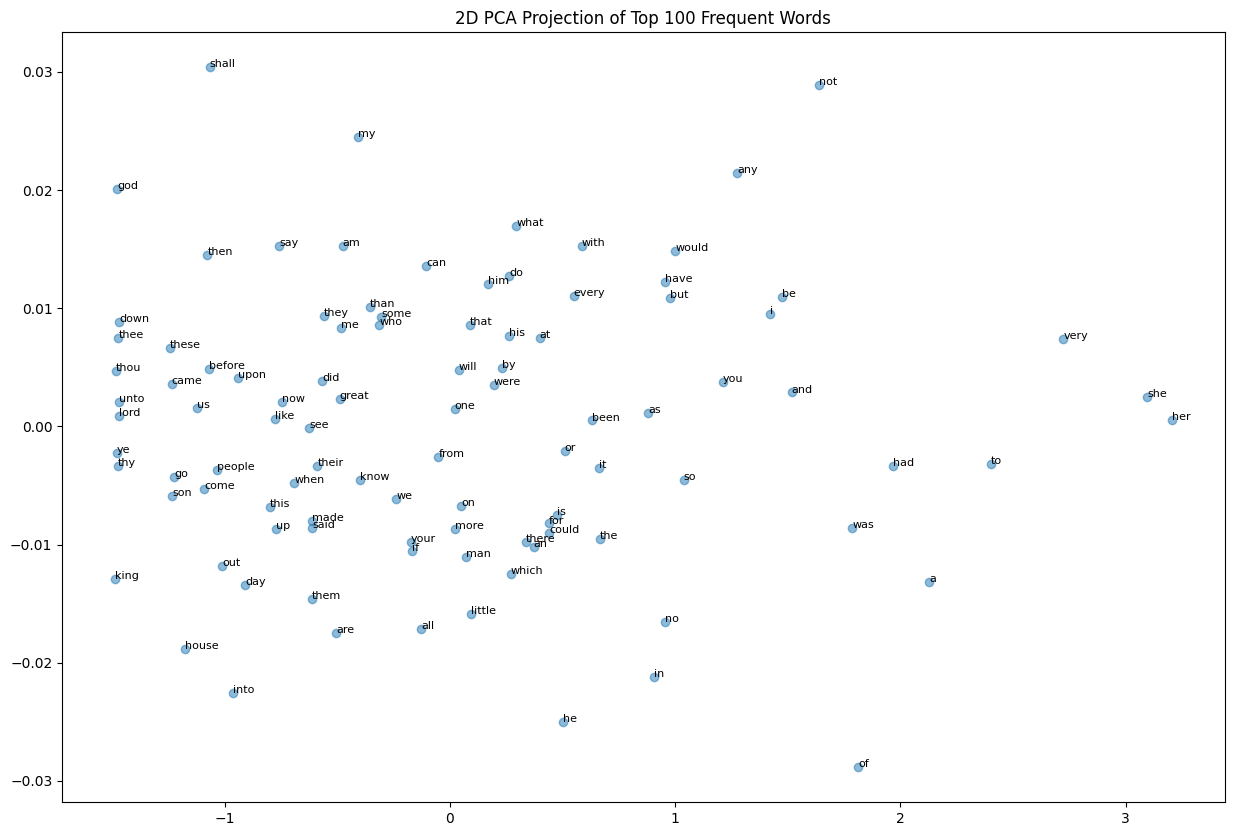

In [ ]:
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(top_vectors)

plt.figure(figsize=(15, 10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], alpha=0.5)

for i, word in enumerate(top_words):
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=8)

plt.title("2D PCA Projection of Top 100 Frequent Words")
plt.show()